In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

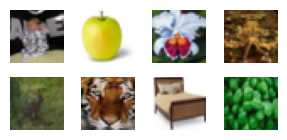

In [5]:
# Display image and label.
display_imgs,_ = next(iter(train_dataloader))
fig, axes = plt.subplots(2, 4, figsize=(3, 1.5))  # 可根据需要调整 figsize
axes = axes.flatten()
for i in range(8):
    img = display_imgs[i].permute(1, 2, 0).numpy()
    axes[i].imshow(img)
    axes[i].axis('off')  # 关闭坐标轴
# 调整子图间距
plt.tight_layout()
plt.show()

In [6]:
import torch.nn as nn

class ToyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(16, 8, kernel_size=3, padding=1), 
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ConvTranspose2d(8, 16, kernel_size=2, stride=2), 
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2), 
            nn.Tanh()
        )

    def forward(self, x):
        return self.layers(x)


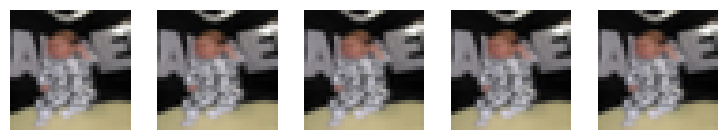

In [8]:
import numpy as np
# add noise
def add_noise(x,t):
    """
        x: shape [batch, channel, w, h]
    """
    return x

def show_add_noise(display_noise_step_size = 5):
    display_noise_step = 1/display_noise_step_size
    noise_steps = arr = np.arange(display_noise_step, 1+display_noise_step, display_noise_step)
    fig, axes = plt.subplots(nrows=1, ncols=display_noise_step_size, figsize=(1.5*display_noise_step_size, 1.5))
    axes = axes.flatten()
    to_add_noise_img = display_imgs[:1] # keep batch dim [1,3,32,32]
    for i, step in enumerate(noise_steps):
        noise_img = add_noise(to_add_noise_img,[step])
        img = noise_img[0].permute(1, 2, 0).numpy()
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()   

show_add_noise()